p is the model parameter
1-p, k=0
p, k=1

likelihood*prior , trying to find the parameters which is p which is the probability that k=1

want to express p as a function of our data

likelihood = p = sigmoid(o0 + o1I + o2T); the sigmoid keeps the value between 0 and 1; the terms are examples
if the probability is dependent on I(interest) and T(term) - the project had six different chunks of 
data so could have a total of 7

prior now needs to have the same omegas


with the data - need dummy variables and need to convert to numbers, normalize the data

Let's use annual income, debt-to-income, interest rate, loan term, funded amount and home ownership to model the loan status.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

/Users/johnnosal/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [46]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
import emcee
import pandas as pd
import corner
%matplotlib inline
from scipy import integrate

In [3]:
import pandas as pd
loanData = pd.read_csv('/Users/johnnosal/Downloads/loan.csv')
loanData.head(20)

/Users/johnnosal/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,66310712,71035433.0,35000.0,35000.0,35000.0,60 months,14.85%,829.90,C,C5,...,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0
1,68476807,73366655.0,10400.0,10400.0,10400.0,60 months,22.45%,289.91,F,F1,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
2,68341763,72928789.0,20000.0,20000.0,20000.0,60 months,10.78%,432.66,B,B4,...,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
4,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
5,68577849,73467703.0,18000.0,18000.0,18000.0,60 months,11.99%,400.31,C,C1,...,0.0,4.0,100.0,0.0,0.0,0.0,309710.0,36127.0,69800.0,26210.0
6,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
7,68506798,73396623.0,23000.0,23000.0,23000.0,60 months,8.49%,471.77,B,B1,...,0.0,2.0,87.9,14.3,0.0,0.0,93962.0,63886.0,39500.0,46662.0
8,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0
9,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0


NameError: name 'loanData2' is not defined

In [5]:
loanData2 = loanData[loanData['loan_status'] != "Current"].reset_index(drop=True)


In [6]:
loanData2 = loanData2[loanData2['loan_status'] != "Late (31-120 days)"].reset_index(drop=True)

In [7]:
loanData2 = loanData2[loanData2['loan_status'] != "Late (16-30 days)"].reset_index(drop=True)

In [8]:
loanData2 = loanData2[loanData2['loan_status'] != "In Grace Period"].reset_index(drop=True)

In [9]:
loanData2 = loanData2[loanData2['loan_status'] != "NaN"].reset_index(drop=True)

In [10]:
Data = loanData2[['annual_inc', 'dti', 'int_rate', 'term', 'funded_amnt', 'home_ownership', 'loan_status']]



In [11]:
Data.tail(20)


,annual_inc,dti,int_rate,term,funded_amnt,home_ownership,loan_status
101135,120000.0,17.40,20.99%,36 months,18275.0,MORTGAGE,Fully Paid
101136,120000.0,26.60,15.59%,36 months,28000.0,RENT,Charged Off
101137,42000.0,10.66,10.49%,36 months,6000.0,RENT,Fully Paid
101138,63078.0,31.70,15.99%,60 months,17000.0,MORTGAGE,Fully Paid
101139,48000.0,36.93,15.99%,36 months,4200.0,MORTGAGE,Charged Off
101140,52000.0,11.28,17.86%,60 months,18700.0,RENT,Fully Paid
101141,55000.0,5.52,15.59%,60 months,25000.0,OWN,Fully Paid
101142,40000.0,25.65,9.49%,36 months,12000.0,RENT,Fully Paid
101143,30000.0,1.00,14.99%,60 months,13150.0,MORTGAGE,Fully Paid
101144,27000.0,18.58,16.49%,36 months,6225.0,RENT,Fully Paid


In [12]:
Data = Data.dropna(subset = ['funded_amnt'])

In [13]:
Data['loan_status'] = Data['loan_status'].replace('Fully Paid', 'Good')
Data['loan_status'] = Data['loan_status'].replace('Default', 'Bad')
Data['loan_status'] = Data['loan_status'].replace('Charged Off', 'Bad')

In [14]:
Data['loan_status'].unique()

array(['Good', 'Bad'], dtype=object)

In [15]:
Data['int_rate'] = Data['int_rate'].str.replace('%', '')

In [16]:
Data['term'] = Data['term'].str.replace(' months', '')

In [17]:
Data.tail()

,annual_inc,dti,int_rate,term,funded_amnt,home_ownership,loan_status
101147,32000.0,29.44,19.24,36,10850.0,OWN,Bad
101148,25400.0,27.08,15.59,36,11575.0,RENT,Good
101149,63000.0,23.69,11.99,36,12000.0,MORTGAGE,Bad
101150,35000.0,30.90,15.99,60,13000.0,RENT,Bad
101151,64400.0,27.19,19.99,60,12000.0,RENT,Bad


In [18]:
Data['annual_inc'] = Data['annual_inc'].astype(float)
Data['dti'] = Data['dti'].astype(float)
Data['int_rate'] = Data['int_rate'].astype(float)
Data['term'] = Data['term'].astype(float)
Data['funded_amnt'] = Data['funded_amnt'].astype(float)

In [19]:
Data.head()

,annual_inc,dti,int_rate,term,funded_amnt,home_ownership,loan_status
0,104433.0,25.37,22.45,60.0,10400.0,MORTGAGE,Good
1,109000.0,26.02,7.49,36.0,25000.0,MORTGAGE,Good
2,112000.0,8.68,11.99,60.0,18000.0,MORTGAGE,Good
3,55000.0,25.49,19.89,36.0,8650.0,RENT,Good
4,180000.0,14.67,9.17,36.0,20000.0,MORTGAGE,Good


In [20]:
type(Data.iloc[1,2])

numpy.float64

In [ ]:
Data.tail()

In [21]:
pd.pivot_table(Data, index='loan_status')

,annual_inc,dti,funded_amnt,int_rate,term
loan_status,,,,,
Bad,70065.278840,21.643665,15606.482586,15.711654,46.009951
Good,79261.978122,17.903194,14619.499759,12.682949,42.249190


In [22]:
pd.pivot_table(Data, index=['home_ownership', 'loan_status'], aggfunc = len).round(2)

annual_inc      dti  funded_amnt  int_rate  \
home_ownership loan_status                                               
MORTGAGE       Bad              9918.0   9918.0       9918.0    9918.0   
               Good            40385.0  40385.0      40385.0   40385.0   
OWN            Bad              2771.0   2771.0       2771.0    2771.0   
               Good             8319.0   8319.0       8319.0    8319.0   
RENT           Bad             11630.0  11630.0      11630.0   11630.0   
               Good            28129.0  28129.0      28129.0   28129.0   

                               term  
home_ownership loan_status           
MORTGAGE       Bad           9918.0  
               Good         40385.0  
OWN            Bad           2771.0  
               Good          8319.0  
RENT           Bad          11630.0  
               Good         28129.0

In [ ]:
Data.head(20)

In [23]:
Data['loan_status'] = Data['loan_status'].replace('Good', 1)
Data['loan_status'] = Data['loan_status'].replace('Bad', 0)

In [ ]:
Data.head(20)

In [24]:
DataDum = pd.get_dummies(Data, columns=['home_ownership']).drop("home_ownership_RENT", axis=1)

In [25]:
DataDum['annual_inc'] = Data['annual_inc'].astype(float)
DataDum['dti'] = Data['dti'].astype(float)
DataDum['int_rate'] = Data['int_rate'].astype(float)
DataDum['term'] = Data['term'].astype(float)
DataDum['funded_amnt'] = Data['funded_amnt'].astype(float)

In [26]:
DataDum.head()

,annual_inc,dti,int_rate,term,funded_amnt,loan_status,home_ownership_MORTGAGE,home_ownership_OWN
0,104433.0,25.37,22.45,60.0,10400.0,1,1.0,0.0
1,109000.0,26.02,7.49,36.0,25000.0,1,1.0,0.0
2,112000.0,8.68,11.99,60.0,18000.0,1,1.0,0.0
3,55000.0,25.49,19.89,36.0,8650.0,1,0.0,0.0
4,180000.0,14.67,9.17,36.0,20000.0,1,1.0,0.0


In [27]:
min_valai = DataDum['annual_inc'].min()
max_valai = DataDum['annual_inc'].max()

def min_max(x):
    return (x-min_valai)/(max_valai-min_valai)
DataDum['annual_inc'] = DataDum['annual_inc'].apply(min_max)

In [28]:
min_valdti = DataDum['dti'].min()
max_valdti = DataDum['dti'].max()

def min_max(x):
    return (x-min_valdti)/(max_valdti-min_valdti)
DataDum['dti'] = DataDum['dti'].apply(min_max)

In [29]:
min_valfa = DataDum['funded_amnt'].min()
max_valfa = DataDum['funded_amnt'].max()

def min_max(x):
    return (x-min_valfa)/(max_valfa-min_valfa)
DataDum['funded_amnt'] = DataDum['funded_amnt'].apply(min_max)

In [30]:
DataDum['int_rate'] = DataDum['int_rate']/100

In [31]:
DataDum.head()

,annual_inc,dti,int_rate,term,funded_amnt,loan_status,home_ownership_MORTGAGE,home_ownership_OWN
0,0.011734,0.002537,0.2245,60.0,0.276471,1,1.0,0.0
1,0.012247,0.002602,0.0749,36.0,0.705882,1,1.0,0.0
2,0.012584,0.000868,0.1199,60.0,0.500000,1,1.0,0.0
3,0.006180,0.002549,0.1989,36.0,0.225000,1,0.0,0.0
4,0.020225,0.001467,0.0917,36.0,0.558824,1,1.0,0.0


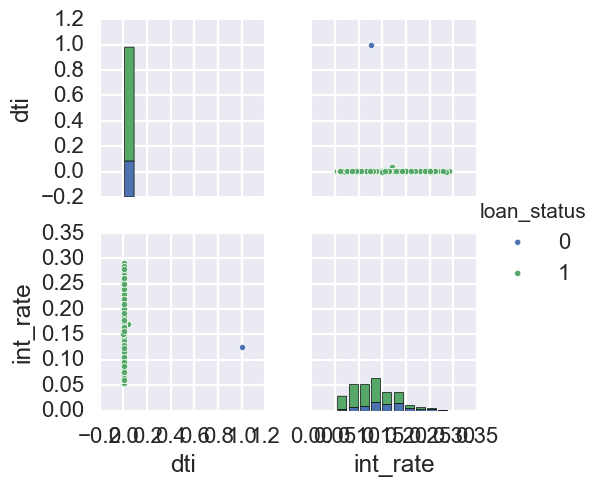

In [32]:
sns.pairplot(DataDum, vars = ['dti', 'int_rate'], hue = 'loan_status')

In [33]:
from scipy.optimize import minimize

In [34]:
DataDum.head()

,annual_inc,dti,int_rate,term,funded_amnt,loan_status,home_ownership_MORTGAGE,home_ownership_OWN
0,0.011734,0.002537,0.2245,60.0,0.276471,1,1.0,0.0
1,0.012247,0.002602,0.0749,36.0,0.705882,1,1.0,0.0
2,0.012584,0.000868,0.1199,60.0,0.500000,1,1.0,0.0
3,0.006180,0.002549,0.1989,36.0,0.225000,1,0.0,0.0
4,0.020225,0.001467,0.0917,36.0,0.558824,1,1.0,0.0


In [35]:
Data2 = DataDum[['loan_status', 'annual_inc', 'dti', 'int_rate', 'term', 'funded_amnt', 'home_ownership_MORTGAGE', 'home_ownership_OWN']]

In [36]:
Data3 = Data2.as_matrix()

In [37]:
Data2.head(20)


,loan_status,annual_inc,dti,int_rate,term,funded_amnt,home_ownership_MORTGAGE,home_ownership_OWN
0,1,0.011734,0.002537,0.2245,60.0,0.276471,1.0,0.0
1,1,0.012247,0.002602,0.0749,36.0,0.705882,1.0,0.0
2,1,0.012584,0.000868,0.1199,60.0,0.500000,1.0,0.0
3,1,0.006180,0.002549,0.1989,36.0,0.225000,0.0,0.0
4,1,0.020225,0.001467,0.0917,36.0,0.558824,1.0,0.0
5,1,0.007303,0.001606,0.1199,36.0,0.697059,1.0,0.0
6,1,0.009888,0.002659,0.0532,36.0,0.488235,1.0,0.0
7,1,0.012247,0.002335,0.1797,60.0,0.441176,1.0,0.0
8,0,0.008427,0.002084,0.2424,60.0,0.683824,1.0,0.0
9,1,0.021910,0.000679,0.1485,60.0,0.779412,1.0,0.0


In [38]:
#sigmoid
sig = lambda x: 1./(1+np.exp(-x))

# log pred
def lnpred(data, a):
    pairedsum = a[0] + a[1]*data[1] + a[2]*data[2] + a[3]*data[3] + a[4]*data[4] + a[5]*data[5] + a[6]*data[6] + a[7]*data[7]
    if data[0] == 1:
        return np.log(sig(pairedsum))
    else:
        return np.log(1-sig(pairedsum))

    
    
    # log prior    
def lnprob(a,data):
    A2 = np.sum([e**2 for e in a])
    return -0.5*A2 + np.sum([lnpred(e,a) for e in data])

In [39]:
# find MAP
rls = lambda a: -lnprob(a, Data3)
minRLS = minimize(lambda a: rls(a),[0,0,0,0,0,0,0, 0])
minRLS.x

array([  3.05990142e+00,   5.69902789e+00,  -4.01077581e+00,
        -1.33650754e+01,  -6.81110892e-03,  -3.00811089e-02,
         4.84365092e-01,   2.15459791e-01])

In [40]:
# get MAP probability based on scaled data
def ppScale(AI, DTI, IR, T, FA, HoM, HoO):
    return sig(minRLS.x[0] + minRLS.x[1]*AI + minRLS.x[2]*DTI + minRLS.x[3]*IR + minRLS.x[4]*T + minRLS.x[5]*FA + minRLS.x[6]*HoM + minRLS.x[7]*HoO)

In [41]:
#Row[0], loan value is 'Good' - MAP assessment
ppScale(0.011734, 0.002537, 0.2245, 60.0, 0.276471, 1.0, 0.0)

0.54575192184505106

In [42]:
#Row[8], loan value is 'Bad' - MAP assessment
ppScale(0.008427, 0.002084, 0.2424, 60.0, 0.683824, 1.0, 0.0)

0.4787634728552001

In [61]:
import random
dataRand = random.sample(Data3,10000) #Take random sample of 10,000 lines from data set

In [ ]:

class BayesReg:
    #Initialize the class - each instance requires a posteriori log function, data set, 
    #number of walkers and number of function parameters
    def __init__(self, post, data, nWalkers, nParameters):
        self.post = post
        self.data = data
        self.nWalkers = nWalkers
        self.nParameters = nParameters

    def BayesTime(self):
        #Moves the walkers and determine parameters and lambda
        p0 = np.random.rand(self.nWalkers*self.nParameters).reshape((self.nWalkers,self.nParameters))
        sampler = emcee.EnsembleSampler(self.nWalkers, self.nParameters, self.post)
        pos, prob, state = sampler.run_mcmc(p0, 1000)
        sampler.reset() #Burns off the first 1000 steps - part of best practice
        pos, prob, state = sampler.run_mcmc(pos, 1000) #Variable number of steps for each walker
        samples = sampler.flatchain
        self.samples = samples
        N = len(samples)
        global omega0, omega1, omega2, omega3, omega4, omega5, omega6, omega7 #makes the variables global and usable outside the function
        omega0 = 1/float(N)*sum([e[0] for e in samples])
        omega1 = 1/float(N)*sum([e[1] for e in samples])
        omega2 = 1/float(N)*sum([e[2] for e in samples])
        omega3 = 1/float(N)*sum([e[3] for e in samples])
        omega4 = 1/float(N)*sum([e[4] for e in samples])
        omega5 = 1/float(N)*sum([e[5] for e in samples])
        omega6 = 1/float(N)*sum([e[6] for e in samples])
        omega7 = 1/float(N)*sum([e[7] for e in samples])
        print ('Omega0 = {0}, Omega1 = {1}, Omega2 = {2}, Omega3 = {3}, Omega4 = {4}, Omega5 = {5}, Omega6 = {6}, Omega7 = {7},'.format(omega0, omega1, omega2, omega3, omega4, omega5, omega6, omega7))




In [ ]:
tide = BayesReg(lambda a: lnprob(a, dataRand), dataRand, 20, 8) #New instance of Class BayesReg called 'tide' - lnprob function is the posterior, data is data, 40 walkers, and four function parameters
tide.BayesTime()

In [58]:
#Probability based on Bayes calculations
def ppScaleBayes(AI, DTI, IR, T, FA, HoM, HoO):
    return sig(omega0 + omega1*AI + omega2*DTI + omega3*IR + omega4*T + omega5*FA + omega6*HoM + omega7*HoO)

In [59]:
#Row[0], loan value is 'Good' - Bayes assessment
ppScaleBayes(0.011734, 0.002537, 0.2245, 60.0, 0.276471, 1.0, 0.0)

0.62144241797347721

In [60]:
#Row[8], loan value is 'Bad' - Bayes assessment
ppScaleBayes(0.008427, 0.002084, 0.2424, 60.0, 0.683824, 1.0, 0.0)

0.57714802792885578